In [78]:
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import json
from matplotlib.pyplot import figure, text

In [79]:

with open('./num_to_name.json',  'r') as f:
    num_to_name = json.load(f)

with open('./name_to_num.json',  'r') as f:
    name_to_num = json.load(f)

In [80]:
graph_csv=pd.read_csv('./EdMot/input/cora_edges.csv').values.tolist()
for i in range(len(graph_csv)):
    for j in range(len(graph_csv[0])):
        graph_csv[i][j] = num_to_name[str(graph_csv[i][j])]

### Graph Based

In [82]:
with open('./EdMot/output/cora_membership.json','r') as f:
    cluster_re = json.load(f)


706

In [83]:
G = nx.from_edgelist(graph_csv)
G.remove_nodes_from([node for node in G.nodes() if G.degree()[node]<=1])

bc_all=nx.betweenness_centrality(G)
V = [node for node in G.nodes()]

In [84]:
k_cl=max(list(cluster_re.values()))
k_cl

37

In [85]:
com = [
    [num_to_name[i] for i in cluster_re.keys() if cluster_re[i]==j] for j in range(k_cl+1)  
       ] 
new_com =[i for i in com if len(i)>20]

In [86]:
G_graph = nx.Graph()
for each in new_com:
    G_graph.update(nx.subgraph(G, each))
color = []
for i in new_com:
    for j in i:
        num = str(name_to_num[j])
        color.append(cluster_re[num])

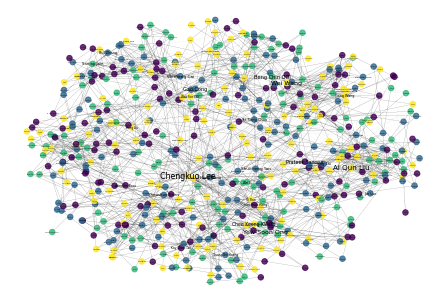

In [100]:
#根据bc赋值node size
G.remove_nodes_from([i for i in G.nodes() if i not in G_graph.nodes()])
pos = nx.spring_layout(G_graph,seed=111, k=0.3)
nx.draw(G, pos, with_labels=False, node_size=2, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, node_color=color, node_size=[(bc_all[i]+1)*30 for i in G_graph.nodes()], width=0.1,alpha = 0.8)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=bc_all[node]*80, ha='center', va='center')
    
plt.savefig('./node_sizeBybc.jpg',dpi = 400)
plt.show()

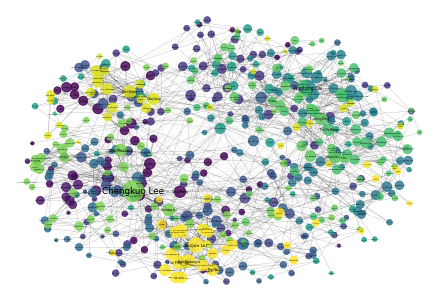

In [88]:
d = dict(G_graph.degree)
pos = nx.spring_layout(G_graph,seed=1111, k=0.3)
nx.draw(G, pos, with_labels=False, node_size=2, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, node_color=color, node_size=[i[1]*10 for i in G_graph.degree()], width=0.1,alpha = 0.8)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=d[node]/5, ha='center', va='center')
    
plt.savefig('./node_sizeBydegree.jpg',dpi = 400)
plt.show()

### Content and Graph Based Result

In [93]:
with open('./EdMot/output/ContentBasedClustering.json','r') as f:
    cluster_re = json.load(f)
G = nx.from_edgelist(graph_csv)
bc_all=nx.betweenness_centrality(G)
V = [node for node in G.nodes()]

In [94]:
k_cl=max(list(cluster_re.values()))
k_cl

3

In [95]:
com = [
    [num_to_name[i] for i in cluster_re.keys() if cluster_re[i]==j] for j in range(k_cl+1)  
       ] 


In [96]:
G_graph = nx.Graph()
for each in new_com:
    G_graph.update(nx.subgraph(G, each))
color = []
for i in new_com:
    for j in i:
        num = str(name_to_num[j])
        color.append(cluster_re[num])

In [97]:
for node in list(G.nodes()):
    if node not in list(G_graph.nodes()):
        G.remove_node(node)

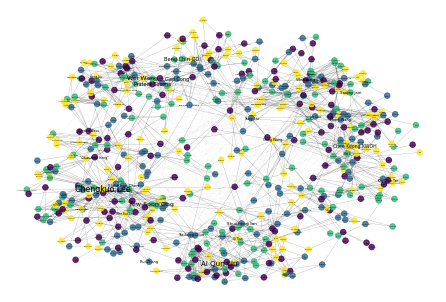

In [98]:
#根据bc赋值node size
G.remove_nodes_from([i for i in G.nodes() if i not in G_graph.nodes()])
pos = nx.spring_layout(G_graph,seed=1111, k=0.2)
nx.draw(G, pos, with_labels=False, node_size=2, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, node_color=color, node_size=[(bc_all[i]+1)*30 for i in G_graph.nodes()], width=0.1,alpha = 0.8)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=bc_all[node]*80, ha='center', va='center')
    
plt.savefig('./node_sizeBybc_ContentBase.jpg',dpi = 400)
plt.show()

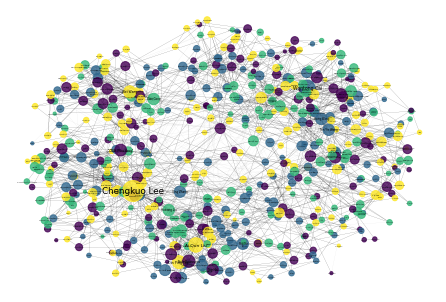

In [99]:
d = dict(G_graph.degree)
pos = nx.spring_layout(G_graph,seed=1111, k=0.3)
nx.draw(G, pos, with_labels=False, node_size=2, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, node_color=color, node_size=[i[1]*10 for i in G_graph.degree()], width=0.1,alpha = 0.8)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=d[node]/5, ha='center', va='center')
    
plt.savefig('./node_sizeBydegree_ContentBase.jpg',dpi = 400)
plt.show()